In [1]:
import nltk
import urllib.request
import urllib.parse
import urllib.error
import ssl
import json
import pandas as pd
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/rishabhjain/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/rishabhjain/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
def plot(X, Y, xlabel, ylabel, title):
    fig = plt.figure(figsize = (10,8))
    plt.bar(X, Y, tick_label=X, width=0.8, color=['red', 'blue'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    plt.subplots_adjust(bottom=0.18)

In [4]:
def plotRelationShip(fd):

    data = {}

    for i in fd.keys():
        if i not in data.keys():
            data[i] = fd[i]
        else:
            data[i] += fd[i]

    X = []
    Y = []

    for i in data.keys():
        X.append(i)

    for i in X:
        Y.append(data[i])

    # Plotting a bar graph for recorded data
    xlabel = 'Entities'
    ylabel = 'Frequency'
    title = 'Relationship between entities and frequency'
    plot(X, Y, xlabel, ylabel, title)

In [5]:
def metrics(truth, run):
    t = set(truth)
    r = set(run)
    intersection = r & t
    True_positive = float(len(intersection))
    if float(len(run)) >= float(True_positive):
        False_positive = len(run) - True_positive
    else:
        False_positive = True_positive - len(run)
    True_negative = 0
    if len(truth) >= len(run):
        False_negative = len(truth) - len(run)
    else:
        False_negative = 0
    accuracy = (float(True_positive) + float(True_negative)) / (float(True_positive) + float(True_negative) + float(False_positive) + float(False_negative))
    precision = float(True_positive) / (float(True_positive) + float(False_positive))
    recall = float(True_positive) / (float(True_positive) + float(False_negative))
    F_measure = (2 * recall * precision) / (recall + precision)
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("F-measure: ", F_measure)
    d = {'Predicted Negative': [True_negative, False_negative],
         'Predicted Positive': [False_positive, True_positive]}
    metricsdf = pd.DataFrame(d, index=['Negative Cases', 'Positive Cases'])
    return metricsdf

In [6]:
# Extracting the first text
print('Downloading books')
site1 = 'http://www.gutenberg.org/files/1342/1342-0.txt'
print('Extracting ', site1)
uh1 = urllib.request.urlopen(site1)
data1 = uh1.read().decode('utf8')

Extracting  http://www.gutenberg.org/files/1342/1342-0.txt


In [7]:
# Extracting the second text
site2 = 'http://www.gutenberg.org/files/829/829-0.txt'
print('Extracting ', site2)
uh2 = urllib.request.urlopen(site2)
data2 = uh2.read().decode('utf8')
print('Downloading of books complete')

Extracting  http://www.gutenberg.org/files/829/829-0.txt


In [8]:
# tokenizing
print('Tokenizing the texts of the books')
token1 = nltk.word_tokenize(data1)
token2 = nltk.word_tokenize(data2)
print('Tokenizing done')

Tokenizing the texts of the books
Tokenizing done


In [9]:
# pos tagging
print('POS tagging')
tagged1 = nltk.pos_tag(token1)
tagged2 = nltk.pos_tag(token2)
print('POS tagging done')

POS tagging
POS tagging done


In [10]:
# Name Entity Recognition
print('Named entity recognition')
namedEnt1 = nltk.ne_chunk(tagged1)
namedEnt2 = nltk.ne_chunk(tagged2)
print('Named entity recognition done')

Named entity recognition
Named entity recognition done


Plotting entities vs. frequency chart for book-1


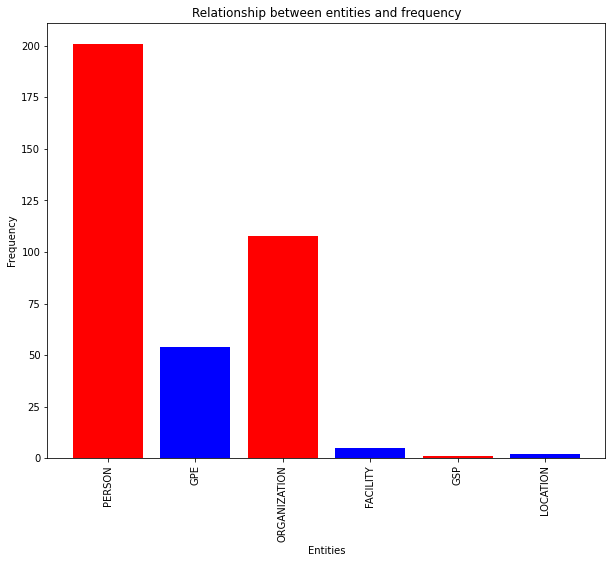

<Figure size 432x288 with 0 Axes>

In [11]:
# plotting entities vs. frequency charts
print('Plotting entities vs. frequency chart for book-1')
lst = []
seen = set()
for chunk in namedEnt1:
    if hasattr(chunk, 'label'):
        tmp = ' '.join(c[0] for c in chunk)
        if tmp not in seen:
            seen.add(tmp)
            lst.append(chunk.label())

plotRelationShip(FreqDist(lst))

Plotting entities vs. frequency chart for book-2


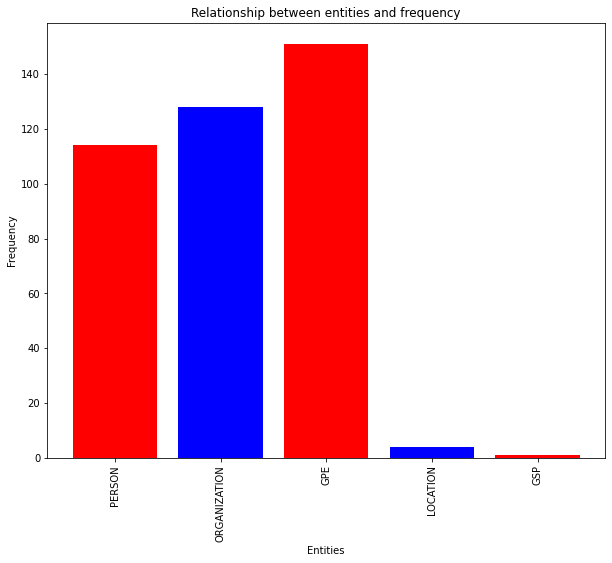

<Figure size 432x288 with 0 Axes>

In [12]:
print('Plotting entities vs. frequency chart for book-2')
lst = []
seen = set()
for chunk in namedEnt2:
    if hasattr(chunk, 'label'):
        # print(chunk.label(), ' '.join(c[0] for c in chunk))
        tmp = ' '.join(c[0] for c in chunk)
        if tmp not in seen:
            seen.add(tmp)
            lst.append(chunk.label())

plotRelationShip(FreqDist(lst))

In [15]:
print('Running NER on random paragraphs from books to evaluate the algorithm')
print('')
print('Paragraph-1 :')
data1 = "But the attention of every lady was soon caught by a young man, whom they had never seen before, of most gentlemanlike appearance, walking with another officer on the other side of the way. The officer was the very Mr. Denny concerning whose return from London Lydia came to inquire, and he bowed as they passed. All were struck with the stranger's air, all wondered who he could be; and Kitty and Lydia, determined if possible to find out, led the way across the street, under pretense of wanting something in an opposite shop, and fortunately had just gained the pavement when the two gentlemen, turning back, had reached the same spot. Mr. Denny addressed them directly, and entreated permission to introduce his friend, Mr. Wickham, who had returned with him the day before from town, and he was happy to say had accepted a commission in their corps. This was exactly as it should be; for the young man wanted only regimentals to make him completely charming. His appearance was greatly in his favour; he had all the best part of beauty, a fine countenance, a good figure, and very pleasing address. The introduction was followed up on his side by a happy readiness of conversation--a readiness at the same time perfectly correct and unassuming; and the whole party were still standing and talking together very agreeably, when the sound of horses drew their notice, and Darcy and Bingley were seen riding down the street. On distinguishing the ladies of the group, the two gentlemen came directly towards them, and began the usual civilities. Bingley was the principal spokesman, and Miss Bennet the principal object. He was then, he said, on his way to Longbourn on purpose to inquire after her. Mr. Darcy corroborated it with a bow, and was beginning to determine not to fix his eyes on Elizabeth, when they were suddenly arrested by the sight of the stranger, and Elizabeth happening to see the countenance of both as they looked at each other, was all astonishment at the effect of the meeting. Both changed colour, one looked white, the other red. Mr. Wickham, after a few moments, touched his hat--a salutation which Mr. Darcy just deigned to return. What could be the meaning of it? It was impossible to imagine; it was impossible not to long to know."
token = nltk.word_tokenize(data1)
tagged = nltk.pos_tag(token)
chunked = nltk.ne_chunk(tagged)

run = []
truth = ['Mr. Denny', 'Kitty', 'Lydia', 'Mr. Wickham', 'Bingley', 'Elizabeth', 'Mr. Darcy', 'Miss Bennet']
for chunk in chunked:
    if hasattr(chunk, 'label'):
        if chunk.label() == 'PERSON':
            # print(chunk.label(), ' '.join(c[0] for c in chunk))
            ne = ' '.join(c[0] for c in chunk)
            run.append(ne)
            
            
print('Maunally labelled PERSON entities : ')
print(set(truth))
print('')
print('Algorithm labelled PERSON entities : ')
print(set(run))
print('')
print('Evaluation :')
print(metrics(truth, run))

Running NER on random paragraphs from books to evaluate the algorithm

Paragraph-1 :
Maunally labelled PERSON entities : 
{'Mr. Denny', 'Kitty', 'Bingley', 'Mr. Darcy', 'Mr. Wickham', 'Elizabeth', 'Miss Bennet', 'Lydia'}

Algorithm labelled PERSON entities : 
{'Mr. Denny', 'Kitty', 'Darcy', 'Bingley', 'Mr. Wickham', 'Mr. Darcy', 'Miss Bennet', 'Elizabeth'}

Evaluation :
Accuracy:  0.5384615384615384
Recall:  1.0
Precision:  0.5384615384615384
F-measure:  0.7000000000000001
                Predicted Negative  Predicted Positive
Negative Cases                   0                 6.0
Positive Cases                   0                 7.0


In [17]:
print('Paragraph-2 :')
data2 = "One morning, about a fortnight after I had obtained my liberty, Reldresal, principal secretary (as they style him) for private affairs, came to my house attended only by one servant. He ordered his coach to wait at a distance, and desired I would give him an hour’s audience; which I readily consented to, on account of his quality and personal merits, as well as of the many good offices he had done me during my solicitations at court. I offered to lie down that he might the more conveniently reach my ear, but he chose rather to let me hold him in my hand during our conversation. He began with compliments on my liberty; said “he might pretend to some merit in it;” but, however, added, “that if it had not been for the present situation of things at court, perhaps I might not have obtained it so soon. For,” said he, “as flourishing a condition as we may appear to be in to foreigners, we labour under two mighty evils: a violent faction at home, and the danger of an invasion, by a most potent enemy, from abroad. As to the first, you are to understand, that for about seventy moons past there have been two struggling parties in this empire, under the names of Tramecksan and Slamecksan, from the high and low heels of their shoes, by which they distinguish themselves. It is alleged, indeed, that the high heels are most agreeable to our ancient constitution; but, however this be, his majesty has determined to make use only of low heels in the administration of the government, and all offices in the gift of the crown, as you cannot but observe; and particularly that his majesty’s imperial heels are lower at least by a drurr than any of his court (drurr is a measure about the fourteenth part of an inch). The animosities between these two parties run so high, that they will neither eat, nor drink, nor talk with each other. We compute the Tramecksan, or high heels, to exceed us in number; but the power is wholly on our side. We apprehend his imperial highness, the heir to the crown, to have some tendency towards the high heels; at least we can plainly discover that one of his heels is higher than the other, which gives him a hobble in his gait. Now, in the midst of these intestine disquiets, we are threatened with an invasion from the island of Blefuscu, which is the other great empire of the universe, almost as large and powerful as this of his majesty. For as to what we have heard you affirm, that there are other kingdoms and states in the world inhabited by human creatures as large as yourself, our philosophers are in much doubt, and would rather conjecture that you dropped from the moon, or one of the stars; because it is certain, that a hundred mortals of your bulk would in a short time destroy all the fruits and cattle of his majesty’s dominions: besides, our histories of six thousand moons make no mention of any other regions than the two great empires of Lilliput and Blefuscu. Which two mighty powers have, as I was going to tell you, been engaged in a most obstinate war for six-and-thirty moons past. It began upon the following occasion. It is allowed on all hands, that the primitive way of breaking eggs, before we eat them, was upon the larger end; but his present majesty’s grandfather, while he was a boy, going to eat an egg, and breaking it according to the ancient practice, happened to cut one of his fingers. Whereupon the emperor his father published an edict, commanding all his subjects, upon great penalties, to break the smaller end of their eggs. The people so highly resented this law, that our histories tell us, there have been six rebellions raised on that account; wherein one emperor lost his life, and another his crown. These civil commotions were constantly fomented by the monarchs of Blefuscu; and when they were quelled, the exiles always fled for refuge to that empire. It is computed that eleven thousand persons have at several times suffered death, rather than submit to break their eggs at the smaller end. Many hundred large volumes have been published upon this controversy: but the books of the Big-endians have been long forbidden, and the whole party rendered incapable by law of holding employments. During the course of these troubles, the emperors of Blefuscu did frequently expostulate by their ambassadors, accusing us of making a schism in religion, by offending against a fundamental doctrine of our great prophet Lustrog, in the fifty-fourth chapter of the Blundecral (which is their Alcoran). This, however, is thought to be a mere strain upon the text; for the words are these: ‘that all true believers break their eggs at the convenient end.’ And which is the convenient end, seems, in my humble opinion to be left to every man’s conscience, or at least in the power of the chief magistrate to determine. Now, the Big-endian exiles have found so much credit in the emperor of Blefuscu’s court, and so much private assistance and encouragement from their party here at home, that a bloody war has been carried on between the two empires for six-and-thirty moons, with various success; during which time we have lost forty capital ships, and a much greater number of smaller vessels, together with thirty thousand of our best seamen and soldiers; and the damage received by the enemy is reckoned to be somewhat greater than ours. However, they have now equipped a numerous fleet, and are just preparing to make a descent upon us; and his imperial majesty, placing great confidence in your valour and strength, has commanded me to lay this account of his affairs before you."
token = nltk.word_tokenize(data2)
tagged = nltk.pos_tag(token)
chunked = nltk.ne_chunk(tagged)

run = []
truth = ['Tramecksan', 'Slamecksan', 'Lustrog', 'Blefuscu', 'Lilliput']
for chunk in chunked:
    if hasattr(chunk, 'label'):
        if chunk.label() == 'PERSON':
            # print(chunk.label(), ' '.join(c[0] for c in chunk))
            ne = ' '.join(c[0] for c in chunk)
            run.append(ne)

print('Maunally labelled PERSON entities : ')
print(set(truth))
print('')
print('Alogorithm labelled PERSON entities : ')
print(set(run))
print('')
print('Evaluation :')
print(metrics(truth, run))

Paragraph-2 :
Maunally labelled PERSON entities : 
{'Slamecksan', 'Blefuscu', 'Lustrog', 'Tramecksan', 'Lilliput'}

Alogorithm labelled PERSON entities : 
{'Blefuscu', 'Lustrog', 'Reldresal'}

Evaluation :
Accuracy:  0.4
Recall:  0.5
Precision:  0.6666666666666666
F-measure:  0.5714285714285715
                Predicted Negative  Predicted Positive
Negative Cases                   0                 1.0
Positive Cases                   2                 2.0
